# **Project Title : Medical Cost Personal Insurance Prediction**

**Project Type- Supervised Learning(Regression)**

**Contribution- Individual**

**Name- Vikash Kumar Diwakar**

# **Project Workflow:**

* **Importing Neccessary Libraries**

* **Data Wrangling**

1. Gathering Data
    - CSV and others files
    - APIs
    - Web Scraping
    - Databases
2. Assessing Data
3. Cleaning Data
* **EDA and Features Engineering on features**

* **Features Transformation and selection**

* **Remove Multicollinearity**

* **model implementation and pre-processing**

1. Train, Test and Split
2. preprocessing using column-transformer

* **Fitting the regression models and HyperParameter Tuning**

* **Final selection of the model**

* **Conclusion**

# **Problem Statement**

**Insurance Forecast by using Regression Algorithms**

Health insurance is a type of insurance that covers medical expenses that arise due to an
illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor
consultation fees. The main purpose of medical insurance is to receive the best medical care without
any strain on your finances. Health insurance plans offer protection against high medical costs. It
covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance
charges, besides many others. Based on certain input features such as age , bmi,,no of
dependents ,smoker ,region medical insurance is calculated .

**Columns :**

• `age`: age of primary beneficiary

• `sex`: insurance contractor gender, female, male

• `bmi`: Body mass index, providing an understanding of body, weights that
are relatively high or low relative to height, objective index of body weight
(kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

• `children`: Number of children covered by health insurance / Number of
dependents

• `smoker`: Smoking

• `region`: the beneficiary's residential area in the US, northeast, southeast,
southwest, northwest.

• `charges`: Individual medical costs billed by health insurance.



In [1]:
import pandas as pd
import numpy as np

In [2]:
path = '/content/medical_cost_insurance.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df = df.drop_duplicates()

In [10]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [11]:
df['age'].value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

# **`Age`**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

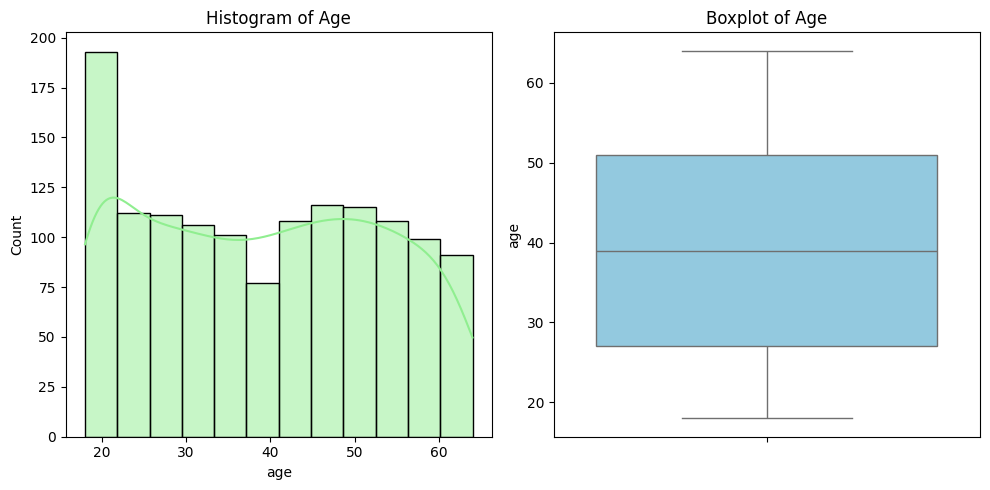

In [13]:
fig, axes = plt.subplots(1,2, figsize =(10,5))

sns.histplot(df['age'], kde = True, ax = axes[0], color='lightgreen')
axes[0].set_title('Histogram of Age')

sns.boxplot(df['age'], ax = axes[1], color='skyblue')
axes[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

# **`Sex`**

In [14]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

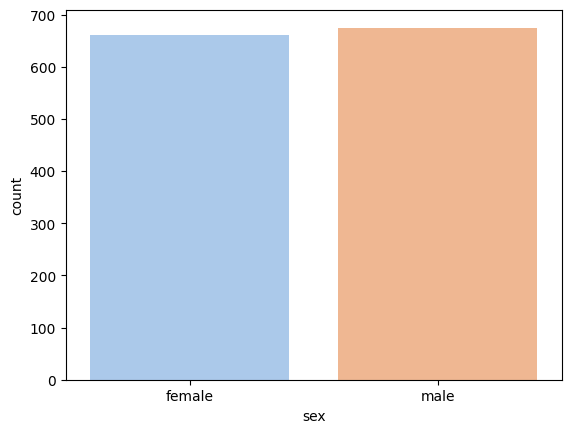

In [15]:
sns.countplot(x = df['sex'], palette = 'pastel');

In [16]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
68,40,female,36.19,0,no,southeast,5920.1041


# **`bmi`**

In [17]:
df['bmi'].value_counts()

bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64

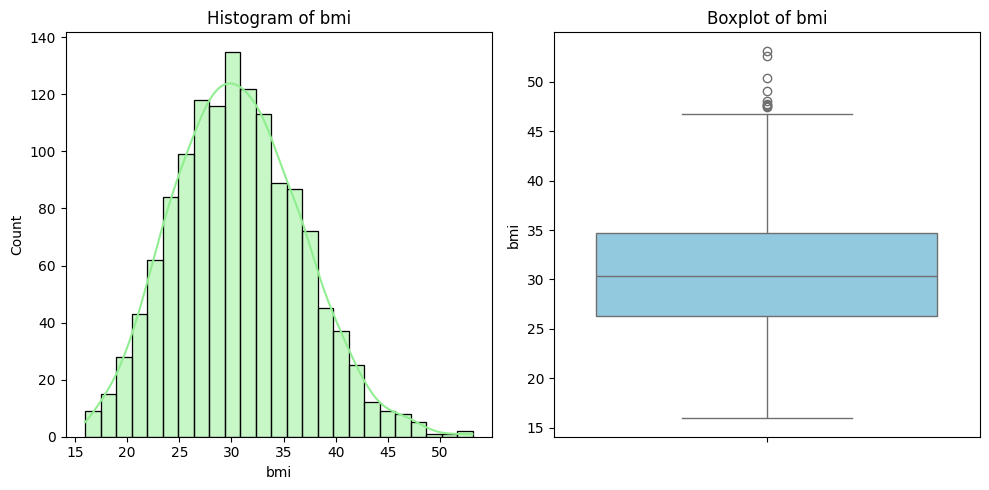

In [18]:
fig, axes = plt.subplots(1,2, figsize =(10,5))

sns.histplot(df['bmi'], kde = True, ax = axes[0], color='lightgreen')
axes[0].set_title('Histogram of bmi')

sns.boxplot(df['bmi'], ax = axes[1], color='skyblue')
axes[1].set_title('Boxplot of bmi')

plt.tight_layout()
plt.show()

* **Clearly there are outliers present in `bmi` column.**
* **lets trest the outliers with appropiate method.**

In [19]:
# treating outlier swith IQR method

# defining interquartilerange(IQR)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier Boundary
lower_bound = round(Q1 - 1.5*IQR, 2)
upper_bound = round(Q3 + 1.5*IQR, 2)

# remove outliers
df = df[df['bmi'] <= upper_bound]

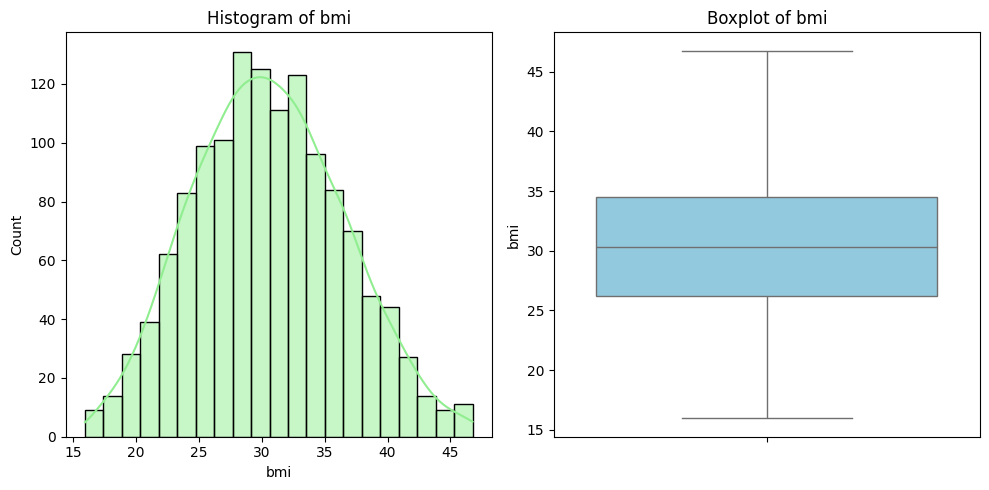

In [20]:
fig, axes = plt.subplots(1,2, figsize =(10,5))

sns.histplot(df['bmi'], kde = True, ax = axes[0], color = 'lightgreen')
axes[0].set_title('Histogram of bmi')

sns.boxplot(df['bmi'], ax = axes[1], color='skyblue')
axes[1].set_title('Boxplot of bmi')

plt.tight_layout()
plt.show()

In [21]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
328,64,female,33.8,1,yes,southwest,47928.03


In [22]:
df['children'].value_counts()

children
0    570
1    320
2    238
3    157
4     25
5     18
Name: count, dtype: int64

In [24]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
988,34,male,34.675,0,no,northeast,4518.82625


In [25]:
df['smoker'].value_counts()

smoker
no     1057
yes     271
Name: count, dtype: int64

In [26]:
df['region'].value_counts()

region
southeast    357
southwest    324
northwest    324
northeast    323
Name: count, dtype: int64

# **EDA**

**Pair Plot**

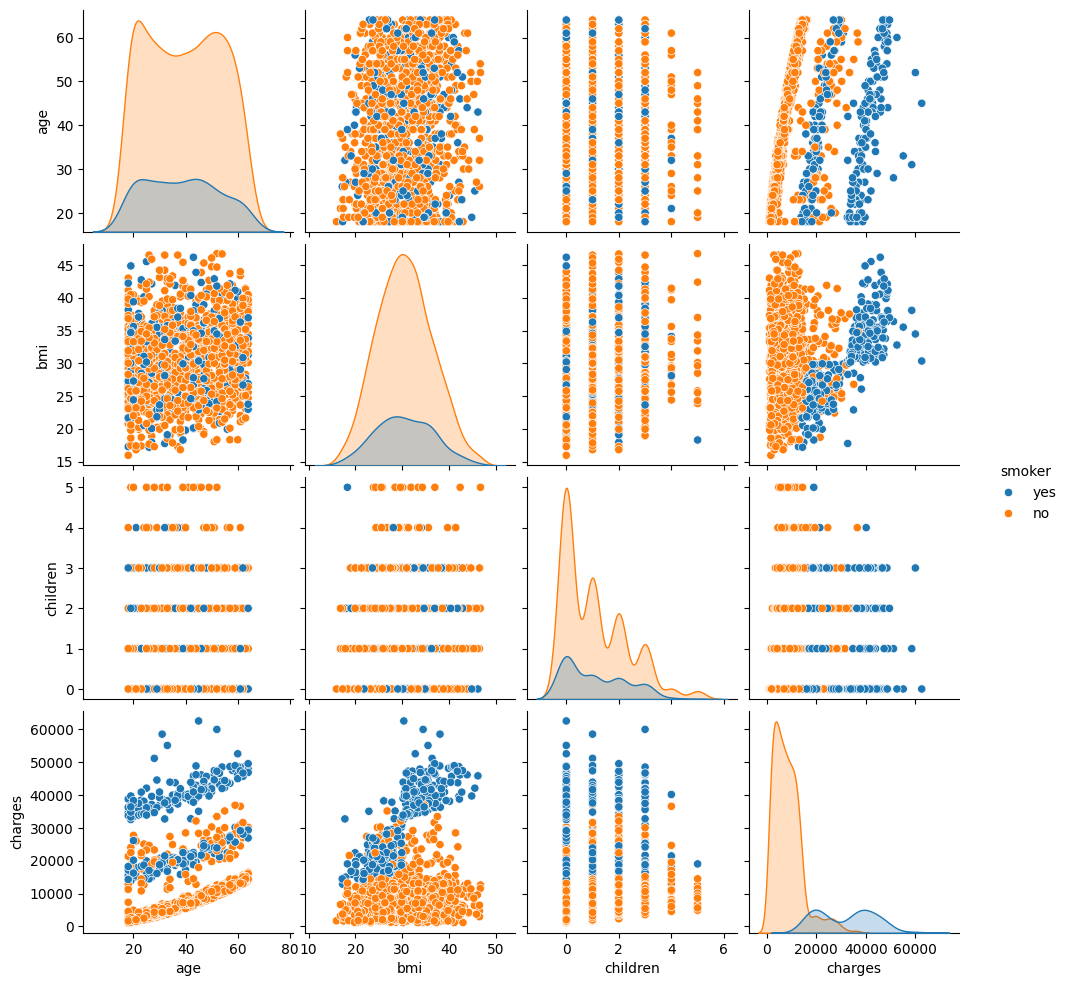

In [27]:
sns.pairplot(df[['age', 'bmi', 'children', 'charges', 'smoker']], hue='smoker')
plt.show()

* number of smokers are higher in high age people and chargers are also higher.
* bmi of person with medical charegers are also higher.
* Number of persons with higher age and bmi are are smokers and they tend to pay higher charges.


**Barplot of Children**

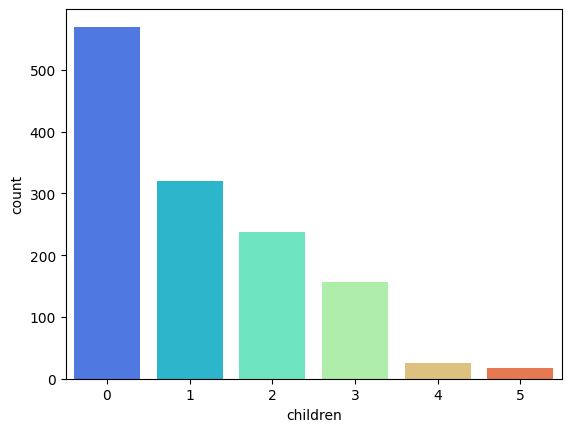

In [23]:
sns.countplot(x='children' , data = df, palette = 'rainbow');

**Age vs BMI**

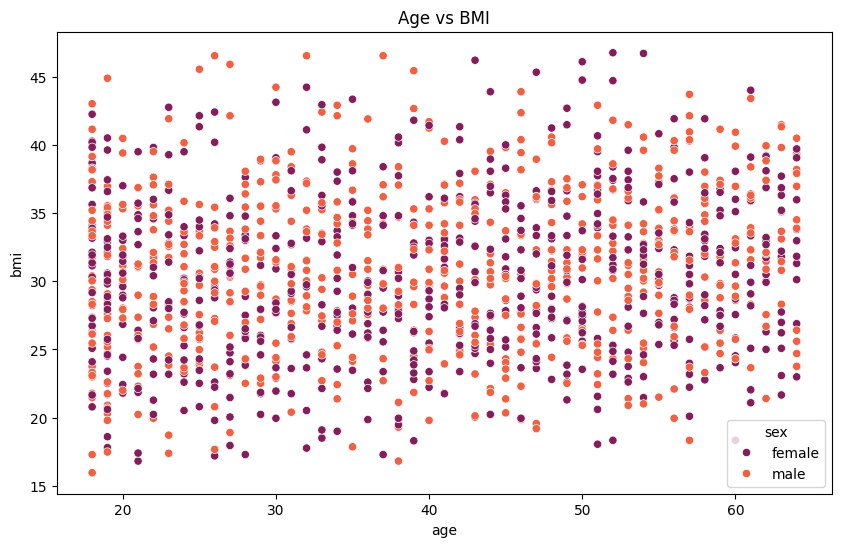

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='sex',palette = 'rocket', data=df)
plt.title('Age vs BMI')
plt.show()

**BMI vs Charges**

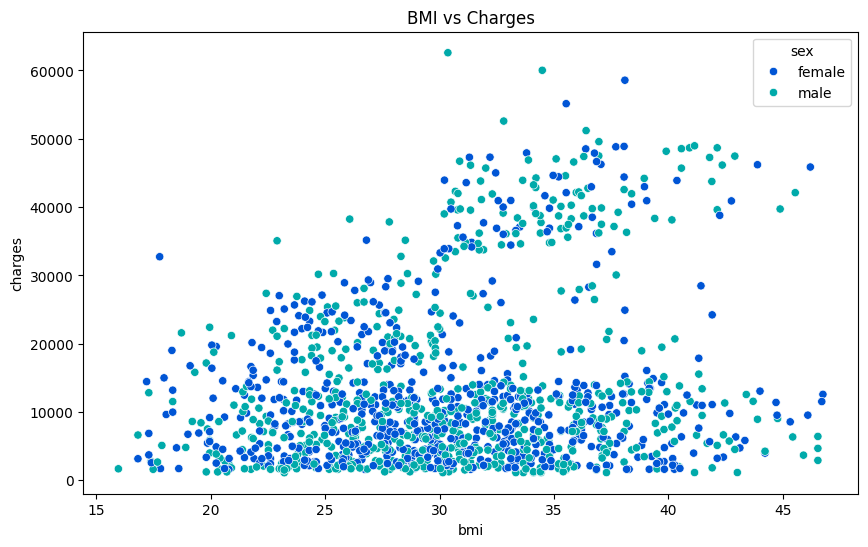

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue = 'sex',palette = 'winter' ,data=df)
plt.title('BMI vs Charges')
plt.show()

**Percentage of Smokers using Piechart**

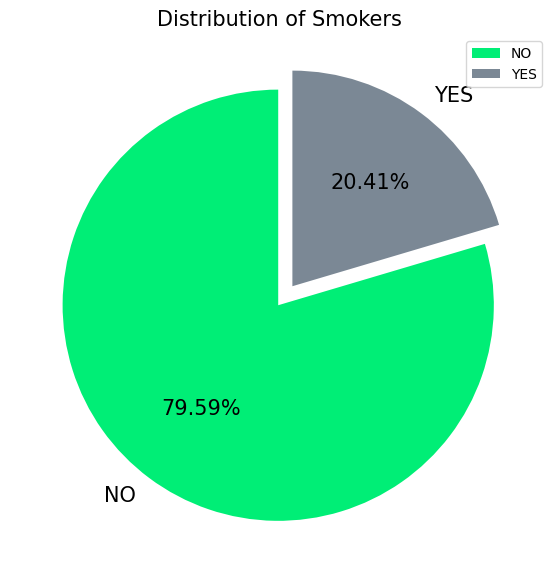

In [45]:
data = df['smoker'].value_counts()
labels = ['NO', 'YES']

# create pie chart
plt.figure(figsize=(7,7))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15},startangle=90)
plt.title('Distribution of Smokers',size=15,loc='center')
plt.legend()
plt.show()

**Age group vs Average medical charges**

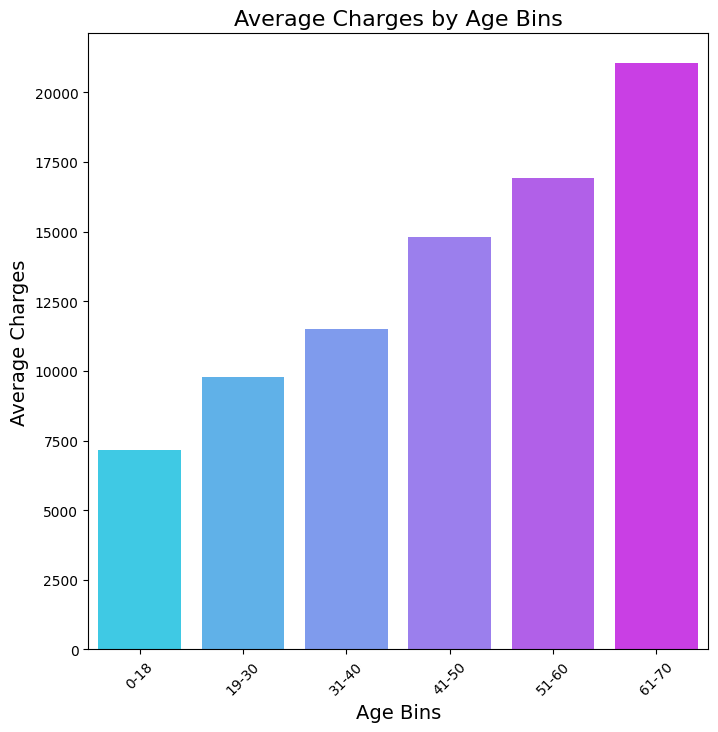

In [55]:
# Create age bins
age_bins = [0, 18, 30, 40, 50, 60, 70]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70']
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculate average charges for each age bin
age_charges = df.groupby('age_bin')['charges'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 8))
sns.barplot(x='age_bin', y='charges', data=age_charges, palette='cool')
plt.title('Average Charges by Age Bins', fontsize=16)
plt.xlabel('Age Bins', fontsize=14)
plt.ylabel('Average Charges', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

In [40]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
104,34,female,27.5,1,no,southwest,5003.853


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Label encode 'sex' and 'smoker' columns
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

In [60]:
# onehot encoding region column
df = pd.get_dummies(df, columns=['region'], sparse = False, dtype = int)

In [61]:
df

,age,sex,bmi,children,smoker,charges,age_bin,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,19-30,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0-18,0,0,1,0
2,28,1,33.000,3,0,4449.46200,19-30,0,0,1,0
3,33,1,22.705,0,0,21984.47061,31-40,0,1,0,0
4,32,1,28.880,0,0,3866.85520,31-40,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,41-50,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,0-18,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0-18,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,19-30,0,0,0,1


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['charges'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif

,VIF Factor,features
0,1.017881,age
1,1.009029,sex
2,1.099322,bmi
3,1.004079,children
4,1.012998,smoker
5,8.890955,region_northeast
6,8.952018,region_northwest
7,11.653743,region_southeast
8,9.539984,region_southwest


# **Model Implementation and Preprocessing**

# **`Train Test Splitting`**

In [68]:
# split the Dataset into independent(x) and dependent(y) Dataset

X = df.drop(columns=['charges','age_bin'])
y = df['charges']

In [69]:
X.shape

(1328, 9)

In [70]:
y.shape

(1328,)

In [71]:
# scaling X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [72]:
X

array([[-1.4404286 , -1.00755869, -0.44549526, ..., -0.56807496,
        -0.60635155,  1.76033106],
       [-1.51166949,  0.99249802,  0.5460678 , ..., -0.56807496,
         1.64920828, -0.56807496],
       [-0.79926057,  0.99249802,  0.41599905, ..., -0.56807496,
         1.64920828, -0.56807496],
       ...,
       [-1.51166949, -1.00755869,  1.06634279, ..., -0.56807496,
         1.64920828, -0.56807496],
       [-1.29794681, -1.00755869, -0.80022821, ..., -0.56807496,
        -0.60635155,  1.76033106],
       [ 1.55168884, -1.00755869, -0.24785833, ...,  1.76033106,
        -0.60635155, -0.56807496]])

In [73]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(1062, 9)
(266, 9)


# **`Linera Regression`**

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

# apply LinearRegression algorithm as step2

step1 = LinearRegression()


# make pipeline
pipe1 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# display pipeline diagram
display(pipe1)

# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1', LinearRegression())])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7562165150432982
Adjusted R2 score 0.7541309148868245


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.723517379766281
Adjusted R2 score 0.7137972876486893


The performance metrics
-----------------------------------------
MAE 4541.4003677630035
MSE 43460449.42646467
RMSE 6592.453976059649


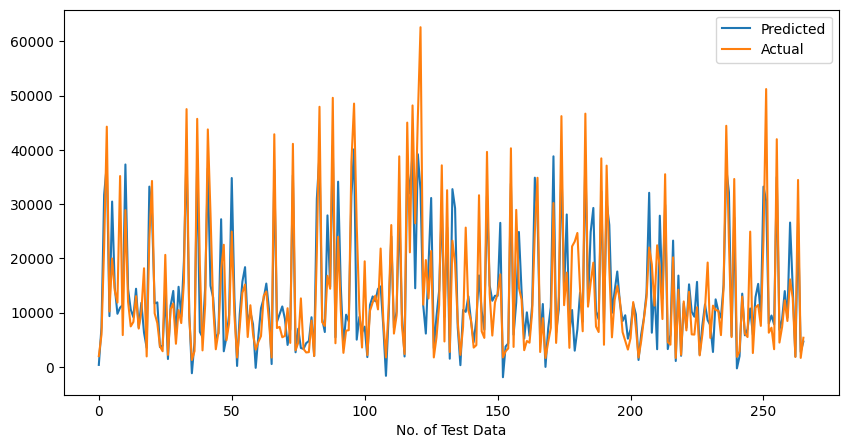

In [77]:
# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Ridge Regression with HyperParameter Tuning`**

In [80]:
# apply RidgeRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Reg_ridge = GridSearchCV(Ridge(), parameters, cv=10)

step1 = Reg_ridge

# make pipeline
pipe2 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)

# display pipeline diagram
display(pipe2)

# Ridge Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_ridge.best_params_)
print('cross-validation score', Reg_ridge.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    3, 5, 8, 12, 15, 18, 21,
                                                    25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7563613479918954
Adjusted R2 score 0.7542769869005712


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.72343515543111
Adjusted R2 score 0.713712172614235


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 8}
cross-validation score 0.7498327130018898


The performance metrics
-----------------------------------------
MAE 4521.327890271518
MSE 43473374.31323442
RMSE 6593.434182065854


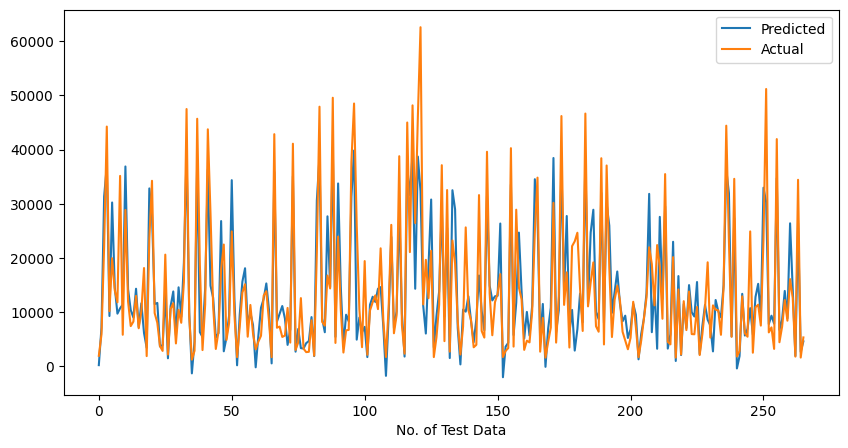

In [81]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Lasso Regression with HyperParameter Tuning`**

In [82]:
# apply LassoRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.linear_model import Lasso

Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)

step1 = Reg_Lasso

# make pipeline
pipe3 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe3.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe3.predict(X_train)
y_pred = pipe3.predict(X_test)

# display pipeline diagram
display(pipe3)

# Lasso Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_Lasso.best_params_)
print('cross-validation score', Reg_Lasso.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    2, 3, 4, 5, 8, 12, 15, 18,
                                                    21, 25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7563673454726523
Adjusted R2 score 0.7542830356905742


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7234745783211061
Adjusted R2 score 0.7137529814652075


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 25}
cross-validation score 0.7499637957959965


The performance metrics
-----------------------------------------
MAE 4504.344889452618
MSE 43467177.408288024
RMSE 6592.964235326021


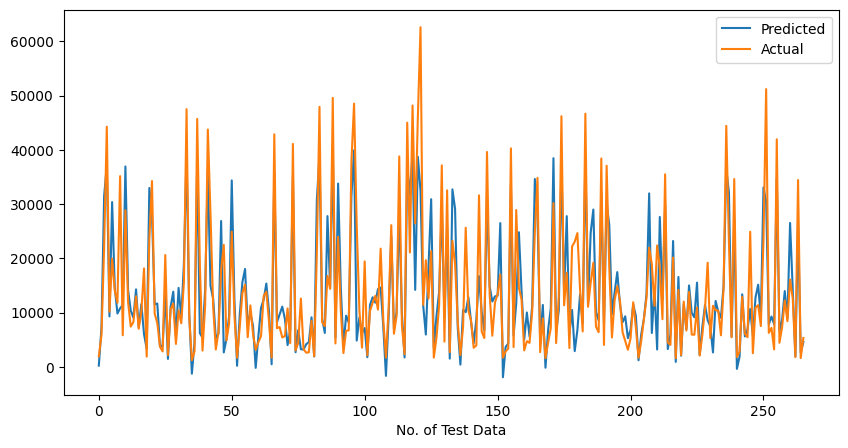

In [83]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Decision Tree Regressor with HyperParameter Tuning`**

In [85]:
# apply DecisionTreeRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'criterion':['squared_error'],             #['squared_error','friedman_mse', 'absolute_error'],
    'splitter' :['best'],                      #['best', 'random'],
    'max_depth' :[4],                          #[6,4,5,6,7,8,9,None],
    'max_features' :[1.0]                      #[1.0,0.25,0.50,0.75,0.85]
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step1 = dtr

# make pipeline
pipe4 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

# display pipeline diagram
display(pipe4)

# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error'],
                                          'max_depth': [4],
                                          'max_features': [1.0],
                                          'splitter': ['best']}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8734567898188313
Adjusted R2 score 0.8723741958153803


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8242354373959384
Adjusted R2 score 0.8180562144918894


Cross-validation score and best params
-----------------------------------------
The best parameters is {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'splitter': 'best'}
cross-validation score 0.8522123982051376


The performance metrics
-----------------------------------------
MAE 3021.139191303767
MSE 27628524.634066295
RMSE 5256.284299204743


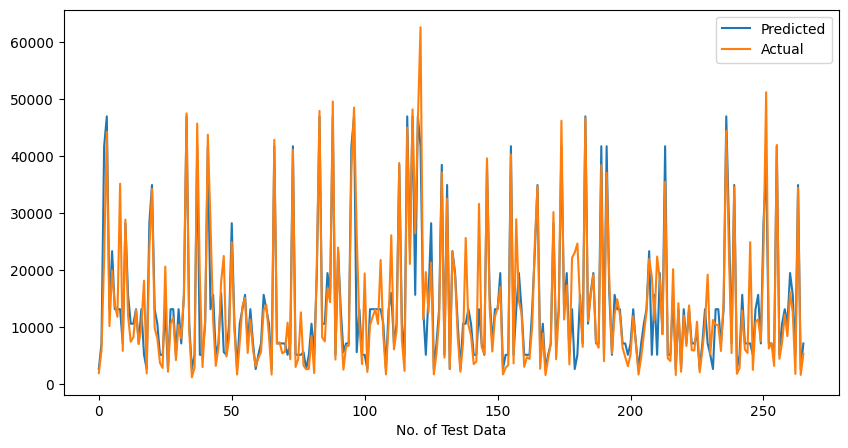

In [86]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Random Forest Regressor with HyperParameter Tuning`**

In [88]:
# apply RandomForestRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators':[100],            # [50,55,60,70,80,90,100],
    'max_depth' : [8],               #[4,5,6,7,8,9,None],
    'max_features' :['log2'],          # ['sqrt','log2'],
    'max_samples' :[1.0]             # [ 0.40,0.50,0.60,0.70,0.75,0.85,1.0]
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step1 = rfr

# make pipeline
pipe5 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# display pipeline diagram
display(pipe5)

# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [8],
                                          'max_features': ['log2'],
                                          'max_samples': [1.0],
                                          'n_estimators': [100]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9274580612575269
Adjusted R2 score 0.9268374553177149


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8331536153535993
Adjusted R2 score 0.8272879221433743


Cross-validation score and best params
-----------------------------------------
The best parameters is {'max_depth': 8, 'max_features': 'log2', 'max_samples': 1.0, 'n_estimators': 100}
cross-validation score 0.8495263416349748


The performance metrics
-----------------------------------------
MAE 3026.723636834005
MSE 26226671.52019789
RMSE 5121.198250429082


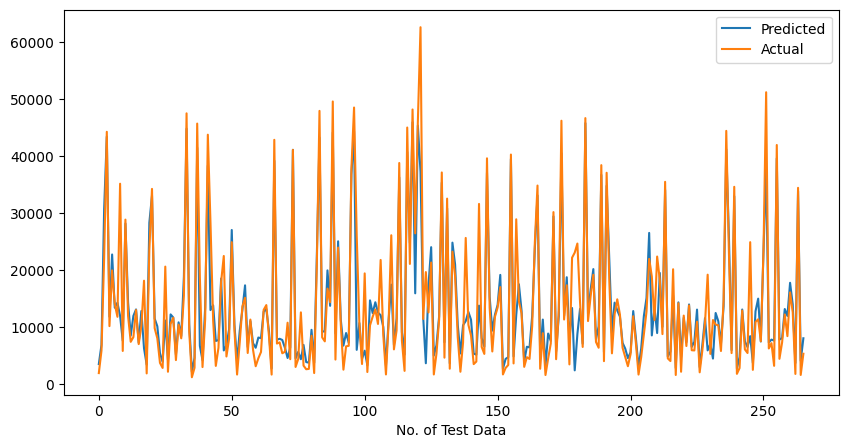

In [89]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`AdaBoost Regressor with HyperParameter Tuning`**

In [91]:
# apply AdaBoostRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[120],           # [50,80,120,160,180,200,220,240],
    'learning_rate' :[0.01],         #[ 0.0001,0.001,0.01,0.1,1],
    'loss' :['square']               # ['linear', 'square', 'exponential']
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor

abr = GridSearchCV(AdaBoostRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step1 = abr

# make pipeline
pipe6 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe6.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe6.predict(X_train)
y_pred = pipe6.predict(X_test)

# display pipeline diagram
display(pipe6)

# AdaBoostRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", abr.best_params_)
print('cross-validation score', abr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                              param_grid={'learning_rate': [0.01],
                                          'loss': ['square'],
                                          'n_estimators': [120]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8617284257490987
Adjusted R2 score 0.8605454940302222


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8310143700305888
Adjusted R2 score 0.8250734689769766


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 120}
cross-validation score 0.8485121214723597


The performance metrics
-----------------------------------------
MAE 3435.3348647606504
MSE 26562940.624899335
RMSE 5153.92477873895


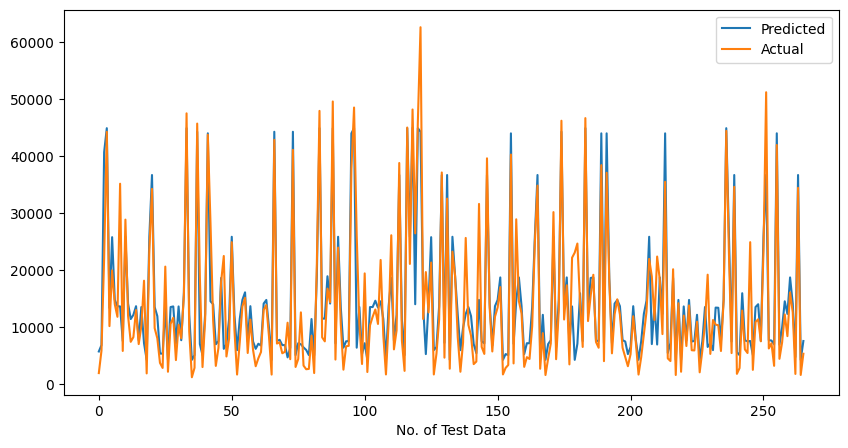

In [92]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`XGBRegressor with hyperparameter tuning`**

In [94]:
# apply XGBRegressor algorithm with hyperparameter tuning as step2
from xgboost import XGBRegressor

# giving parameters
parameters = {
    'n_estimators' :[150],              # [150,160,170,180,200],
    'learning_rate' :[0.05],            # [0.001,0.005,0.01,0.05,0.1],
    'max_depth' :[3],                   #[3,4,5,6,7,8]
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
xgbr = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid=parameters , cv=10, n_jobs=-1)

step1 = xgbr

# make pipeline
pipe7 = Pipeline([
    ('step1',step1)
])

# fit the pipeline on training dataset
pipe7.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe7.predict(X_train)
y_pred = pipe7.predict(X_test)

# display pipeline diagram
display(pipe7)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", xgbr.best_params_)
print('cross-validation score', xgbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 GridSearchCV(cv=10,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_constraints...
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.05],
                                          'max_depth': [3],
                                          'n_estimators': [150]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8927038780207179
Adjusted R2 score 0.8917859454182335


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8424775847000822
Adjusted R2 score 0.8369396872871944


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
cross-validation score 0.8623306105986087


The performance metrics
-----------------------------------------
MAE 2657.15756454755
MSE 24761031.843120992
RMSE 4976.045803961313


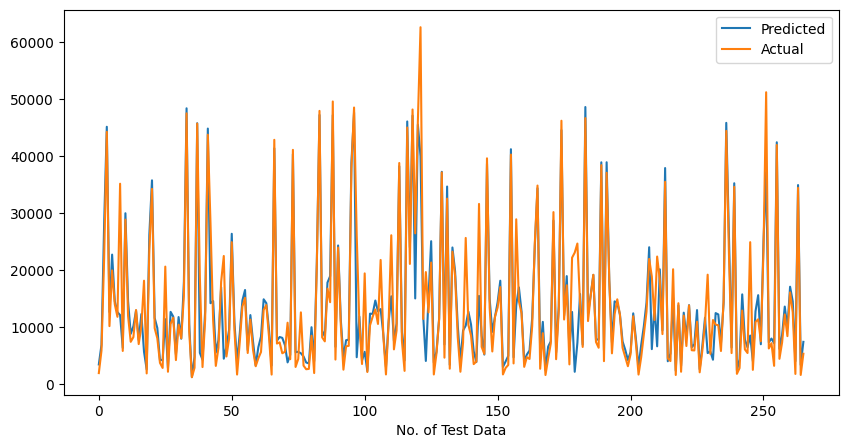

In [95]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **Result**

*  **`XGBRegressor`** outperformed all other algorithms and gave the best test score of **84.24%.**
